In [329]:
import gensim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import word2vec
import nltk,re
from tqdm import tqdm

In [330]:
data=pd.read_csv('/content/Reviews.csv')
print(data.head())

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [335]:
data=data.drop(['Id','ProductId','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Time','Summary'], axis=1, inplace=False)
print(data.head())

   Score                                               Text
0      5  I have bought several of the Vitality canned d...
1      1  Product arrived labeled as Jumbo Salted Peanut...
2      4  This is a confection that has been around a fe...
3      2  If you are looking for the secret ingredient i...
4      5  Great taffy at a great price.  There was a wid...


In [336]:
data.isnull().sum()

,0
Score,0
Text,0


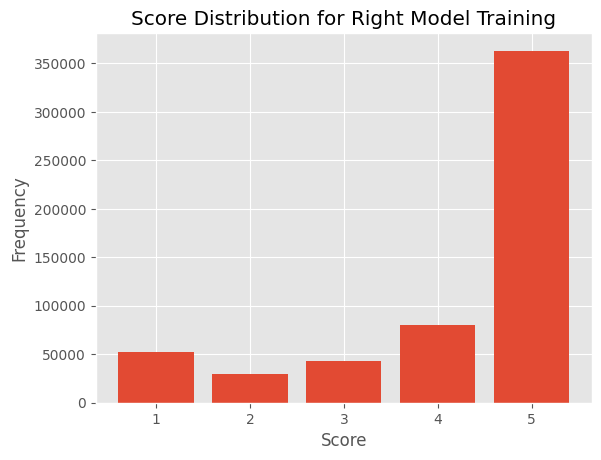

In [337]:
score_counts = data['Score'].value_counts()

plt.bar(score_counts.index, score_counts.values)

plt.title('Score Distribution for Right Model Training')
plt.xlabel('Score')
plt.ylabel('Frequency')


plt.show()


In [267]:
#data2 = data.sample(n=500, random_state=564).reset_index(drop=True)
#print(data2.shape)

(500, 2)


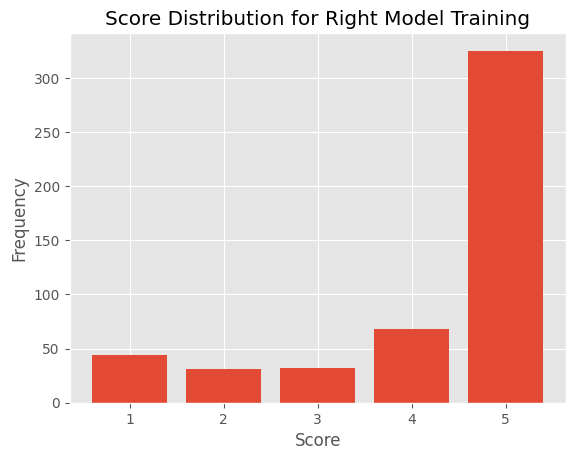

In [268]:
# score_counts = data2['Score'].value_counts()

# plt.bar(score_counts.index, score_counts.values)

# plt.title('Score Distribution for Right Model Training')
# plt.xlabel('Score')
# plt.ylabel('Frequency')


# plt.show()


In [338]:
from nltk.stem import WordNetLemmatizer
lm=WordNetLemmatizer()
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [339]:
print(data.head())

   Score                                               Text
0      5  I have bought several of the Vitality canned d...
1      1  Product arrived labeled as Jumbo Salted Peanut...
2      4  This is a confection that has been around a fe...
3      2  If you are looking for the secret ingredient i...
4      5  Great taffy at a great price.  There was a wid...


In [340]:
corpus =[]
for i in tqdm(range(0,len(data))):
  review = re.sub('[^a-zA-Z]', ' ',data['Text'][i])
  review = review.lower()
  review = review.split()

  review = [lm.lemmatize(word) for word in review]
  review = ' '.join(review)
  corpus.append(review)

[[i,j,k] for i,j,k in zip(list(map(len,corpus)),corpus, data['Text']) if i<1]


100%|██████████| 568454/568454 [05:09<00:00, 1834.63it/s]


[[0,
  '',
  '&#1056;&#1077;&#1096;&#1080;&#1083;&#1072; &#1079;&#1072;&#1082;&#1072;&#1079;&#1072;&#1090;&#1100; &#1101;&#1090;&#1080; &#1078;&#1077;&#1083;&#1072;&#1090;&#1080;&#1085;&#1082;&#1080;, &#1090;.&#1082;. &#1076;&#1086;&#1095;&#1082;&#1072; &#1087;&#1086;&#1096;&#1083;&#1072; &#1074; &#1096;&#1082;&#1086;&#1083;&#1091; &#1080; &#1090;&#1088;&#1077;&#1073;&#1091;&#1077;&#1090; &#1089;&#1083;&#1072;&#1076;&#1086;&#1089;&#1090;&#1080;. &#1054;&#1095;&#1077;&#1085;&#1100; &#1091;&#1076;&#1086;&#1073;&#1085;&#1072;&#1103; &#1091;&#1087;&#1072;&#1082;&#1086;&#1074;&#1082;&#1072;. &#1050;&#1072;&#1082; &#1088;&#1072;&#1079; &#1089;&#1090;&#1086;&#1083;&#1100;&#1082;&#1086; &#1082;&#1086;&#1085;&#1092;&#1077;&#1090;, &#1082;&#1072;&#1082; &#1080; &#1090;&#1088;&#1077;&#1073;&#1091;&#1077;&#1090;&#1089;&#1103;, &#1095;&#1090;&#1086;&#1073;&#1099; &#1089;&#1100;&#1077;&#1089;&#1090;&#1100; &#1080;&#1093; &#1079;&#1072; &#1087;&#1077;&#1088;&#1077;&#1084;&#1077;&#1085;&#1091;.']]

In [341]:
corpus

['i have bought several of the vitality canned dog food product and have found them all to be of good quality the product look more like a stew than a processed meat and it smell better my labrador is finicky and she appreciates this product better than most',
 'product arrived labeled a jumbo salted peanut the peanut were actually small sized unsalted not sure if this wa an error or if the vendor intended to represent the product a jumbo',
 'this is a confection that ha been around a few century it is a light pillowy citrus gelatin with nut in this case filbert and it is cut into tiny square and then liberally coated with powdered sugar and it is a tiny mouthful of heaven not too chewy and very flavorful i highly recommend this yummy treat if you are familiar with the story of c s lewis the lion the witch and the wardrobe this is the treat that seduces edmund into selling out his brother and sister to the witch',
 'if you are looking for the secret ingredient in robitussin i believe i

In [342]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [343]:
words = []
for sent in tqdm(corpus):
  sent_token=sent_tokenize(sent)
  for sent in sent_token:
    words.append(simple_preprocess(sent))

print(words)

100%|██████████| 568454/568454 [01:19<00:00, 7171.69it/s]


In [348]:
model = gensim.models.Word2Vec(words)

In [349]:
model.corpus_count

568453

In [350]:
model.epochs

5

In [351]:
model.wv.similar_by_word('good')

[('decent', 0.799389660358429),
 ('great', 0.7831465005874634),
 ('fantastic', 0.7154486775398254),
 ('terrific', 0.709658682346344),
 ('phenomenal', 0.6657065153121948),
 ('bad', 0.6607794761657715),
 ('fabulous', 0.6594536900520325),
 ('awesome', 0.6506226658821106),
 ('yummy', 0.642889678478241),
 ('nice', 0.6407718658447266)]

In [352]:
def avg_word2vec(doc):
  return np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key],axis=0)

In [364]:
x=[]
for i in tqdm(range(len(words))):
  try:
    x.append(avg_word2vec(words[i]))
  except RuntimeError:
    print("Empty value at",i)


 33%|███▎      | 187977/568453 [11:20<25:46, 246.03it/s]/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 568453/568453 [33:22<00:00, 283.93it/s]


In [379]:
len(x)

56844599

In [366]:
x[187996]

array([-0.49974802, -0.44527748,  0.06347239,  1.0080822 ,  0.30461732,
       -0.139523  ,  0.0200932 ,  0.4618173 ,  0.20140333,  0.06330311,
        0.5942524 ,  0.3803974 , -0.12024453,  0.39708978,  0.35669416,
        0.05792651, -0.07046732, -0.02330654,  0.26978454, -0.1189208 ,
       -0.01098801, -0.24012703,  0.38596523, -0.9235825 , -0.37061086,
        0.40876988, -0.94970185,  0.9625453 , -0.4888004 ,  0.14625035,
       -0.88343763, -0.26519847, -0.23040912,  0.27750388, -0.49075532,
       -0.09330855, -0.2465411 ,  0.02307524,  0.0254334 , -0.09688363,
        0.3206263 , -0.4967484 ,  0.07912514,  0.1759896 ,  0.12755802,
       -0.3140006 , -0.40377095, -0.4436096 , -0.32271177, -0.8424743 ,
        0.2727474 ,  0.1373779 , -0.02169207, -0.35193858, -0.15931535,
        0.07904091,  0.6685979 , -0.23789161,  0.32542768, -0.2431963 ,
       -0.3761871 , -0.7691969 ,  0.40237498, -0.08032843,  0.28335744,
       -0.10232869, -0.03971063,  0.3860644 , -0.64901966, -1.08

In [368]:


# Filter out invalid entries (e.g., NaN or None)
x_cleaned = [vec for vec in x if vec is not None and not np.isnan(vec).any()]

print(f"Original length: {len(x)}, Cleaned length: {len(x_cleaned)}")


Original length: 568453, Cleaned length: 568446


In [375]:
x=x_cleaned

In [376]:
x = np.delete(x,188001 )
print(len(x))

56844599


In [371]:
y=data['Score']
print(y.head())

0    5
1    1
2    4
3    2
4    5
Name: Score, dtype: int64


In [ ]:
data2 = []
for i in tqdm(range(0, len(x))):
    data2.append(x[i].reshape(1, -1))


df = pd.DataFrame(np.vstack(data2))


In [ ]:
df.head()

In [ ]:
df['output']=y

In [ ]:
df.head()

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

In [ ]:
x=df.drop('output',axis=1)
y=df['output']

In [294]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

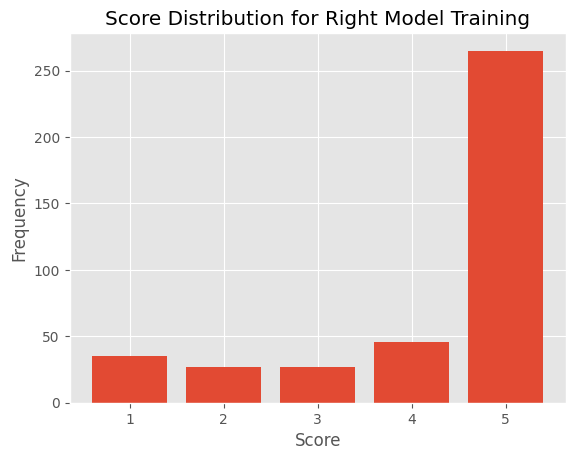

In [298]:
score_counts = y_train.value_counts()

plt.bar(score_counts.index, score_counts.values)

plt.title('Score Distribution for Right Model Training')
plt.xlabel('Score')
plt.ylabel('Frequency')


plt.show()


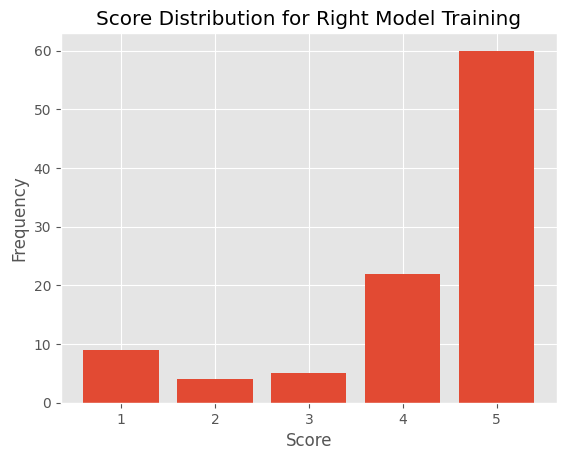

In [299]:
score_counts = y_test.value_counts()

plt.bar(score_counts.index, score_counts.values)

plt.title('Score Distribution for Right Model Training')
plt.xlabel('Score')
plt.ylabel('Frequency')


plt.show()

In [300]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)

In [301]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        22
           5       0.60      1.00      0.75        60

    accuracy                           0.60       100
   macro avg       0.12      0.20      0.15       100
weighted avg       0.36      0.60      0.45       100



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
